In [ ]:
import pandas as pd
import numpy as np
import json
import gzip

In [ ]:
properties = pd.read_csv('schemaorg-current-https-properties.csv')
types = pd.read_csv('schemaorg-current-https-types.csv')

In [3]:
properties.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1442 non-null   object 
 1   label               1442 non-null   object 
 2   comment             1442 non-null   object 
 3   subPropertyOf       146 non-null    object 
 4   equivalentProperty  26 non-null     object 
 5   subproperties       46 non-null     object 
 6   domainIncludes      1441 non-null   object 
 7   rangeIncludes       1441 non-null   object 
 8   inverseOf           50 non-null     object 
 9   supersedes          66 non-null     object 
 10  supersededBy        67 non-null     object 
 11  isPartOf            0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 135.3+ KB


In [4]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1329 non-null   object 
 1   label            1329 non-null   object 
 2   comment          1329 non-null   object 
 3   subTypeOf        1320 non-null   object 
 4   enumerationtype  441 non-null    object 
 5   equivalentClass  18 non-null     object 
 6   properties       801 non-null    object 
 7   subTypes         176 non-null    object 
 8   supersedes       12 non-null     object 
 9   supersededBy     15 non-null     object 
 10  isPartOf         0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 114.3+ KB


In [5]:
display(properties)

,id,label,comment,subPropertyOf,equivalentProperty,subproperties,domainIncludes,rangeIncludes,inverseOf,supersedes,supersededBy,isPartOf
0,https://schema.org/about,about,The subject matter of the content.,NaN,NaN,https://schema.org/mainEntity,"https://schema.org/CommunicateAction, https://...",https://schema.org/Thing,https://schema.org/subjectOf,NaN,NaN,NaN
1,https://schema.org/abridged,abridged,Indicates whether the book is an abridged edit...,NaN,NaN,NaN,https://schema.org/Book,https://schema.org/Boolean,NaN,NaN,NaN,NaN
2,https://schema.org/abstract,abstract,An abstract is a short description that summar...,NaN,NaN,NaN,https://schema.org/CreativeWork,https://schema.org/Text,NaN,NaN,NaN,NaN
3,https://schema.org/accelerationTime,accelerationTime,The time needed to accelerate the vehicle from...,NaN,NaN,NaN,https://schema.org/Vehicle,https://schema.org/QuantitativeValue,NaN,NaN,NaN,NaN
4,https://schema.org/acceptedAnswer,acceptedAnswer,"The answer(s) that has been accepted as best, ...",https://schema.org/suggestedAnswer,NaN,NaN,https://schema.org/Question,"https://schema.org/Answer, https://schema.org/...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,https://schema.org/xpath,xpath,"An XPath, e.g. of a <a class=""localLink"" href=...",NaN,NaN,NaN,"https://schema.org/SpeakableSpecification, htt...",https://schema.org/XPathType,NaN,NaN,NaN,NaN
1438,https://schema.org/yearBuilt,yearBuilt,"The year an <a class=""localLink"" href=""/Accomm...",NaN,NaN,NaN,https://schema.org/Accommodation,https://schema.org/Number,NaN,NaN,NaN,NaN
1439,https://schema.org/yearlyRevenue,yearlyRevenue,The size of the business in annual revenue.,NaN,NaN,NaN,https://schema.org/BusinessAudience,https://schema.org/QuantitativeValue,NaN,NaN,NaN,NaN
1440,https://schema.org/yearsInOperation,yearsInOperation,The age of the business.,NaN,NaN,NaN,https://schema.org/BusinessAudience,https://schema.org/QuantitativeValue,NaN,NaN,NaN,NaN


In [31]:
display(properties[properties["equivalentProperty"].notnull()])

,id,label,comment,subPropertyOf,equivalentProperty,subproperties,domainIncludes,rangeIncludes,inverseOf,supersedes,supersededBy,isPartOf
372,https://schema.org/description,description,A description of the item.,NaN,http://purl.org/dc/terms/description,"https://schema.org/disambiguatingDescription, ...",https://schema.org/Thing,https://schema.org/Text,NaN,NaN,NaN,NaN
634,https://schema.org/identifier,identifier,The identifier property represents any kind of...,NaN,http://purl.org/dc/terms/identifier,"https://schema.org/accountId, https://schema.o...",https://schema.org/Thing,"https://schema.org/PropertyValue, https://sche...",NaN,NaN,NaN,NaN
706,https://schema.org/isbn,isbn,The ISBN of the book.,https://schema.org/identifier,http://purl.org/ontology/bibo/isbn,NaN,https://schema.org/Book,https://schema.org/Text,NaN,NaN,NaN,NaN
709,https://schema.org/issn,issn,The International Standard Serial Number (ISSN...,https://schema.org/identifier,http://purl.org/ontology/bibo/issn,NaN,"https://schema.org/Blog, https://schema.org/Cr...",https://schema.org/Text,NaN,NaN,NaN,NaN
710,https://schema.org/issueNumber,issueNumber,Identifies the issue of publication; for examp...,https://schema.org/position,http://purl.org/ontology/bibo/issue,NaN,https://schema.org/PublicationIssue,"https://schema.org/Integer, https://schema.org...",NaN,NaN,NaN,NaN
749,https://schema.org/legislationApplies,legislationApplies,Indicates that this legislation (or part of a ...,NaN,http://data.europa.eu/eli/ontology#implements,https://schema.org/legislationTransposes,https://schema.org/Legislation,https://schema.org/Legislation,NaN,NaN,NaN,NaN
750,https://schema.org/legislationChanges,legislationChanges,Another legislation that this legislation chan...,NaN,http://data.europa.eu/eli/ontology#changes,NaN,https://schema.org/Legislation,https://schema.org/Legislation,NaN,NaN,NaN,NaN
751,https://schema.org/legislationConsolidates,legislationConsolidates,Indicates another legislation taken into accou...,NaN,http://data.europa.eu/eli/ontology#consolidates,NaN,https://schema.org/Legislation,https://schema.org/Legislation,NaN,NaN,NaN,NaN
752,https://schema.org/legislationDate,legislationDate,The date of adoption or signature of the legis...,https://schema.org/dateCreated,http://data.europa.eu/eli/ontology#date_document,NaN,https://schema.org/Legislation,https://schema.org/Date,NaN,NaN,NaN,NaN
753,https://schema.org/legislationDateVersion,legislationDateVersion,The point-in-time at which the provided descri...,NaN,http://data.europa.eu/eli/ontology#version_date,NaN,https://schema.org/Legislation,https://schema.org/Date,NaN,NaN,NaN,NaN


In [32]:
display(properties[properties["subPropertyOf"].notnull()])

,id,label,comment,subPropertyOf,equivalentProperty,subproperties,domainIncludes,rangeIncludes,inverseOf,supersedes,supersededBy,isPartOf
4,https://schema.org/acceptedAnswer,acceptedAnswer,"The answer(s) that has been accepted as best, ...",https://schema.org/suggestedAnswer,NaN,NaN,https://schema.org/Question,"https://schema.org/Answer, https://schema.org/...",NaN,NaN,NaN,NaN
16,https://schema.org/accommodationCategory,accommodationCategory,"Category of an <a class=""localLink"" href=""/Acc...",https://schema.org/category,NaN,NaN,https://schema.org/Accommodation,https://schema.org/Text,NaN,NaN,NaN,NaN
18,https://schema.org/accountId,accountId,The identifier for the account the payment wil...,https://schema.org/identifier,NaN,NaN,https://schema.org/Invoice,https://schema.org/Text,NaN,NaN,NaN,NaN
22,https://schema.org/acquireLicensePage,acquireLicensePage,Indicates a page documenting how licenses can ...,https://schema.org/usageInfo,NaN,NaN,https://schema.org/CreativeWork,"https://schema.org/CreativeWork, https://schem...",NaN,NaN,NaN,NaN
27,https://schema.org/actionOption,actionOption,A sub property of object. The options subject ...,https://schema.org/object,NaN,NaN,https://schema.org/ChooseAction,"https://schema.org/Text, https://schema.org/Thing",NaN,https://schema.org/option,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,https://schema.org/volumeNumber,volumeNumber,Identifies the volume of publication or multi-...,https://schema.org/position,http://purl.org/ontology/bibo/volume,NaN,https://schema.org/PublicationVolume,"https://schema.org/Integer, https://schema.org...",NaN,NaN,NaN,NaN
1425,https://schema.org/winner,winner,A sub property of participant. The winner of t...,https://schema.org/participant,NaN,NaN,https://schema.org/LoseAction,https://schema.org/Person,NaN,NaN,NaN,NaN
1430,https://schema.org/workLocation,workLocation,A contact location for a person's place of work.,https://schema.org/location,NaN,NaN,https://schema.org/Person,"https://schema.org/ContactPoint, https://schem...",NaN,NaN,NaN,NaN
1431,https://schema.org/workPerformed,workPerformed,"A work performed in some event, for example a ...",https://schema.org/workFeatured,NaN,NaN,https://schema.org/Event,https://schema.org/CreativeWork,NaN,NaN,NaN,NaN


In [33]:
display(properties[properties["supersedes"].notnull()])

,id,label,comment,subPropertyOf,equivalentProperty,subproperties,domainIncludes,rangeIncludes,inverseOf,supersedes,supersededBy,isPartOf
26,https://schema.org/actionApplication,actionApplication,An application that can complete the request.,NaN,NaN,NaN,https://schema.org/EntryPoint,https://schema.org/SoftwareApplication,NaN,https://schema.org/application,NaN,NaN
27,https://schema.org/actionOption,actionOption,A sub property of object. The options subject ...,https://schema.org/object,NaN,NaN,https://schema.org/ChooseAction,"https://schema.org/Text, https://schema.org/Thing",NaN,https://schema.org/option,NaN,NaN
34,https://schema.org/actor,actor,"An actor, e.g. in tv, radio, movie, video game...",NaN,NaN,https://schema.org/readBy,"https://schema.org/Clip, https://schema.org/Cr...",https://schema.org/Person,NaN,https://schema.org/actors,NaN,NaN
55,https://schema.org/album,album,A music album.,NaN,NaN,NaN,https://schema.org/MusicGroup,https://schema.org/MusicAlbum,NaN,https://schema.org/albums,NaN,NaN
91,https://schema.org/areaServed,areaServed,The geographic area where a service or offered...,NaN,NaN,"https://schema.org/availableAtOrFrom, https://...","https://schema.org/ContactPoint, https://schem...","https://schema.org/AdministrativeArea, https:/...",NaN,https://schema.org/serviceArea,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,https://schema.org/subEvent,subEvent,An Event that is part of this event. For examp...,NaN,NaN,NaN,https://schema.org/Event,https://schema.org/Event,https://schema.org/superEvent,https://schema.org/subEvents,NaN,NaN
1297,https://schema.org/targetCollection,targetCollection,A sub property of object. The collection targe...,https://schema.org/object,NaN,NaN,https://schema.org/UpdateAction,https://schema.org/Thing,NaN,https://schema.org/collection,NaN,NaN
1310,https://schema.org/temporalCoverage,temporalCoverage,The temporalCoverage of a CreativeWork indicat...,NaN,http://purl.org/dc/terms/temporal,NaN,https://schema.org/CreativeWork,"https://schema.org/DateTime, https://schema.or...",NaN,https://schema.org/datasetTimeInterval,NaN,NaN
1342,https://schema.org/track,track,A music recording (track)&#x2014;usually a sin...,NaN,NaN,NaN,"https://schema.org/MusicGroup, https://schema....","https://schema.org/ItemList, https://schema.or...",NaN,https://schema.org/tracks,NaN,NaN


In [18]:
person_example = pd.read_json('Person_123movies.pics_September2020.json.gz', compression='gzip', lines=True)

In [19]:
person_example.head()

,row_id,name,description,sameas,page_url
0,0,Anna Faris,"Anna Faris was born in Baltimore, Maryland, on...",https://ww1.123movies.pics/celebrity/anna-fari...,https://ww1.123movies.pics/movie/cloudy-with-a...
1,1,Elisa Gabrielli,Actress and Improvisor Elisa Gabrielli began h...,https://ww1.123movies.pics/celebrity/elisa-gab...,https://ww1.123movies.pics/movie/cloudy-with-a...
2,2,Tania Gunadi,"Tania Gunadi was born in Bandung, Java, Indone...",https://ww1.123movies.pics/celebrity/tania-gun...,https://ww1.123movies.pics/movie/cloudy-with-a...
3,3,Walter Jones,"Walter is an actor, dancer and singer. Walter ...",https://ww1.123movies.pics/celebrity/walter-jo...,https://ww1.123movies.pics/movie/cloudy-with-a...
4,4,James Caan,A masculine and enigmatic actor whose life and...,https://ww1.123movies.pics/celebrity/james-caa...,https://ww1.123movies.pics/movie/cloudy-with-a...


In [34]:
path = '..Person_statistics/column_statistics/'

In [35]:
person_columns = pd.read_csv('Person_statistics/column_statistics/top100_Person_column_statistics.txt')


In [36]:
person_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   column                         66 non-null     object 
 1   occurs_in_percentage_of_hosts  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [63]:
display(person_columns[person_columns['occurs_in_percentage_of_hosts'] >= 10.00])

,column,occurs_in_percentage_of_hosts
0,name,98.0
1,description,40.0
2,jobtitle,35.0
3,birthdate,29.0
4,address,26.0
5,url,23.0
6,givenname,20.0
7,familyname,19.0
8,telephone,18.0
9,image,14.0


In [66]:
place_statistics = pd.read_csv('Place_statistics/column_statistics/Place_column_statistics.txt')
display(place_statistics)

,column,occurs_in_percentage_of_hosts
0,address,93.05
1,name,90.04
2,telephone,62.39
3,geo,40.18
4,description,18.22
...,...,...
249,quote,0.00
250,interactionstatistic,0.00
251,videocode,0.00
252,fonction,0.00


In [68]:
display(place_statistics[place_statistics['occurs_in_percentage_of_hosts']>= 10])

,column,occurs_in_percentage_of_hosts
0,address,93.05
1,name,90.04
2,telephone,62.39
3,geo,40.18
4,description,18.22


In [69]:
airport_columns = pd.read_csv('Airport_statistics/column_statistics/Airport_column_statistics.txt')
display(airport_columns)

,column,occurs_in_percentage_of_hosts
0,name,97.05
1,geo,71.85
2,address,69.44
3,telephone,52.28
4,description,44.77
5,iatacode,42.90
6,icaocode,28.42
7,image,19.57
8,email,14.75
9,openinghours,11.26


In [70]:
display(airport_columns[airport_columns['occurs_in_percentage_of_hosts']>=10])

,column,occurs_in_percentage_of_hosts
0,name,97.05
1,geo,71.85
2,address,69.44
3,telephone,52.28
4,description,44.77
5,iatacode,42.90
6,icaocode,28.42
7,image,19.57
8,email,14.75
9,openinghours,11.26


In [78]:
hotel_sample = pd.read_json('Hotel_jsonsample.json', lines=True)
display(hotel_sample)

,row_id,name,address,description,pricerange,page_url
0,0,Hotel Nautic,"{'streetaddress': 'Virgilio 24 Ca´n Pastilla, ...",Este hotel moderno y minimalista ubicado en la...,desde 78€ por noche (igualamos el precio),https://www.es.lastminute.com/hoteles/espana/c...
1,1,Hotel Ginepro,"{'streetaddress': 'VIA ADAMELLO 27, Aprica, It...",Near Aprica Ski Area,£80 per night - Save up to 25% - Price Match G...,https://www.lastminute.com/hotels/italy/aprica...
2,2,Best Western Plus Casino Royale - Center Strip...,"{'streetaddress': '3411 Las Vegas Blvd S, Las ...",Near The Venetian Casino,£215 per night - Save up to 25% - Price Match ...,https://www.lastminute.com/hotels/united-state...
3,3,Hotel Reinholdi Guest Accommodation,"{'addressregion': 'Haapsalu linn', 'streetaddr...",El Reinholdi Guest Accommodation está situado ...,desde 35€ por noche (igualamos el precio),https://www.es.lastminute.com/hoteles/estonia/...
4,4,Hotel Parkway Guesthouse,"{'addressregion': 'Dublin City', 'streetaddres...",Este agradable hotel está ubicado en O'Connell...,desde 130€ por noche (igualamos el precio),https://www.es.lastminute.com/hoteles/irlanda/...
5,5,Hôtel Dream Inn Dubai Apartments Duplex Ctrl P...,{'streetaddress': 'One by Omniyat Business Bay...,Cet hôtel raffiné est à Dubai,"à partir de 18,507€ par nuit avec garantie du ...",https://www.fr.lastminute.com/hotel/emirats-ar...
6,6,"The Edwardian Manchester, A Radisson Collectio...","{'addressregion': 'Greater Manchester', 'stree...","Situé au coeur de Manchester, près de GMEX, ce...",à partir de 103€ par nuit avec garantie du mei...,https://www.fr.lastminute.com/hotel/royaume-un...
7,7,Hotel Bologna Airport,"{'streetaddress': 'Via M.E Lepido 203/14, Bolo...",Near Ducati Museum,£60 per night - Save up to 25% - Price Match G...,https://www.lastminute.com/hotels/italy/bologn...
8,8,Vysotsky Hotel,"{'addressregion': 'Russian Federation', 'stree...",Vysotsky Hotel is located on the 39th floor of...,£77 per night - Save up to 25% - Price Match G...,https://www.lastminute.com/hotels/russian-fede...
9,9,Residence Sodexo Hotel,"{'addresscountry': 'Algeria', 'streetaddress':...",This hotel enjoys a great location in Hassi Me...,£54 per night - Save up to 25% - Price Match G...,https://www.lastminute.com/hotels/algeria/hass...


In [2]:
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files'

In [3]:
stats = pd.read_csv(path + '/all_files_stats.csv')

In [4]:
stats.head()

,column_name,percentage,filename,num_tables
0,name,0.997982,MusicRecording_stats.csv,12858.0
1,name,0.995770,Recipe_stats.csv,8711.0
2,name,0.994361,Product_stats.csv,432728.0
3,name,0.987900,Restaurant_stats.csv,1143.0
4,name,0.983577,Hotel_stats.csv,1078.0


In [4]:
files = pd.read_csv(path + '/all_files_cleaned.csv')

In [29]:
files.head()

,Unnamed: 0,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
0,0,name/ Product_stats.csv,name,string,0.994361,Product_stats.csv,432728.0,product_name
1,1,offers/ Product_stats.csv,offers,string,0.964249,Product_stats.csv,419624.0,offer
2,2,brand/ Product_stats.csv,brand,string,0.403728,Product_stats.csv,175695.0,product_name
3,3,headline/ CreativeWork_stats.csv,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline
4,4,author/ CreativeWork_stats.csv,author,string,0.776499,CreativeWork_stats.csv,63162.0,person_name


In [31]:
files

,Unnamed: 0,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
0,0,name/ Product_stats.csv,name,string,0.994361,Product_stats.csv,432728.0,product_name
1,1,offers/ Product_stats.csv,offers,string,0.964249,Product_stats.csv,419624.0,offer
2,2,brand/ Product_stats.csv,brand,string,0.403728,Product_stats.csv,175695.0,product_name
3,3,headline/ CreativeWork_stats.csv,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline
4,4,author/ CreativeWork_stats.csv,author,string,0.776499,CreativeWork_stats.csv,63162.0,person_name
...,...,...,...,...,...,...,...,...
202,203,numtracks/ MusicAlbum_stats.csv,numtracks,int,0.415808,MusicAlbum_stats.csv,121.0,number
203,204,menu/ Restaurant_stats.csv,menu,string,0.104581,Restaurant_stats.csv,121.0,text_description
204,205,contactpoint/ Person_stats.csv,contactpoint,string,0.009353,Person_stats.csv,120.0,text_description
205,206,email/ Hotel_stats.csv,email,string,0.107664,Hotel_stats.csv,118.0,email


In [9]:
stats

,column_name,percentage,filename,num_tables
0,name,0.997982,MusicRecording_stats.csv,12858.0
1,name,0.995770,Recipe_stats.csv,8711.0
2,name,0.994361,Product_stats.csv,432728.0
3,name,0.987900,Restaurant_stats.csv,1143.0
4,name,0.983577,Hotel_stats.csv,1078.0
...,...,...,...,...
356,seller,0.000152,Product_stats.csv,66.0
357,type,0.000149,Product_stats.csv,65.0
358,telephone,0.000142,Product_stats.csv,62.0
359,additionaltype,0.000136,Product_stats.csv,59.0


In [26]:
print(files.groupby('data_type').size().sort_values(ascending = False))

data_type
string         150
datetime        21
float           18
int             13
geolocation      5
dtype: int64


In [2]:
import matplotlib.pyplot as plt

In [45]:
data_types = files.groupby('data_type').agg({'num_tables':'count'})

In [46]:
data_types

,num_tables
data_type,
datetime,21
float,18
geolocation,5
int,13
string,150


In [47]:
data_types = data_types.sort_values(['num_tables'], ascending=False)

In [48]:
data_types

,num_tables
data_type,
string,150
datetime,21
float,18
int,13
geolocation,5


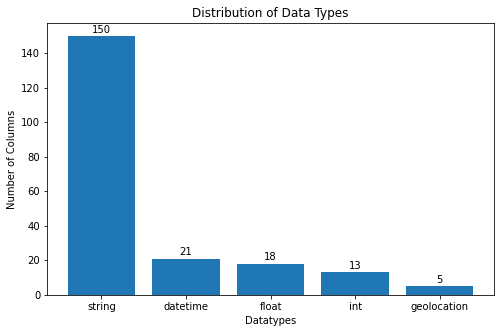

In [65]:
x = data_types.index
y = data_types['num_tables']

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.xlabel('Datatypes')
plt.ylabel('Number of Columns')
plt.title('Distribution of Data Types')
for index,data in enumerate(y):
    plt.text(x=index , y =data+2, s=f"{data}", ha ='center')
plt.show()

In [45]:
largest20_columns = files.head(20)

In [46]:
largest20_columns

,Unnamed: 0,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
0,0,name/ Product_stats.csv,name,string,0.994361,Product_stats.csv,432728.0,product_name
1,1,offers/ Product_stats.csv,offers,string,0.964249,Product_stats.csv,419624.0,offer
2,2,brand/ Product_stats.csv,brand,string,0.403728,Product_stats.csv,175695.0,product_name
3,3,headline/ CreativeWork_stats.csv,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline
4,4,author/ CreativeWork_stats.csv,author,string,0.776499,CreativeWork_stats.csv,63162.0,person_name
5,5,datepublished/ CreativeWork_stats.csv,datepublished,datetime,0.743515,CreativeWork_stats.csv,60479.0,date
6,6,aggregaterating/ Product_stats.csv,aggregaterating,string,0.084252,Product_stats.csv,36665.0,rating
7,7,datemodified/ CreativeWork_stats.csv,datemodified,datetime,0.400064,CreativeWork_stats.csv,32542.0,date
8,8,mpn/ Product_stats.csv,mpn,string,0.063612,Product_stats.csv,27683.0,text_description
9,9,category/ Product_stats.csv,category,string,0.053017,Product_stats.csv,23072.0,category


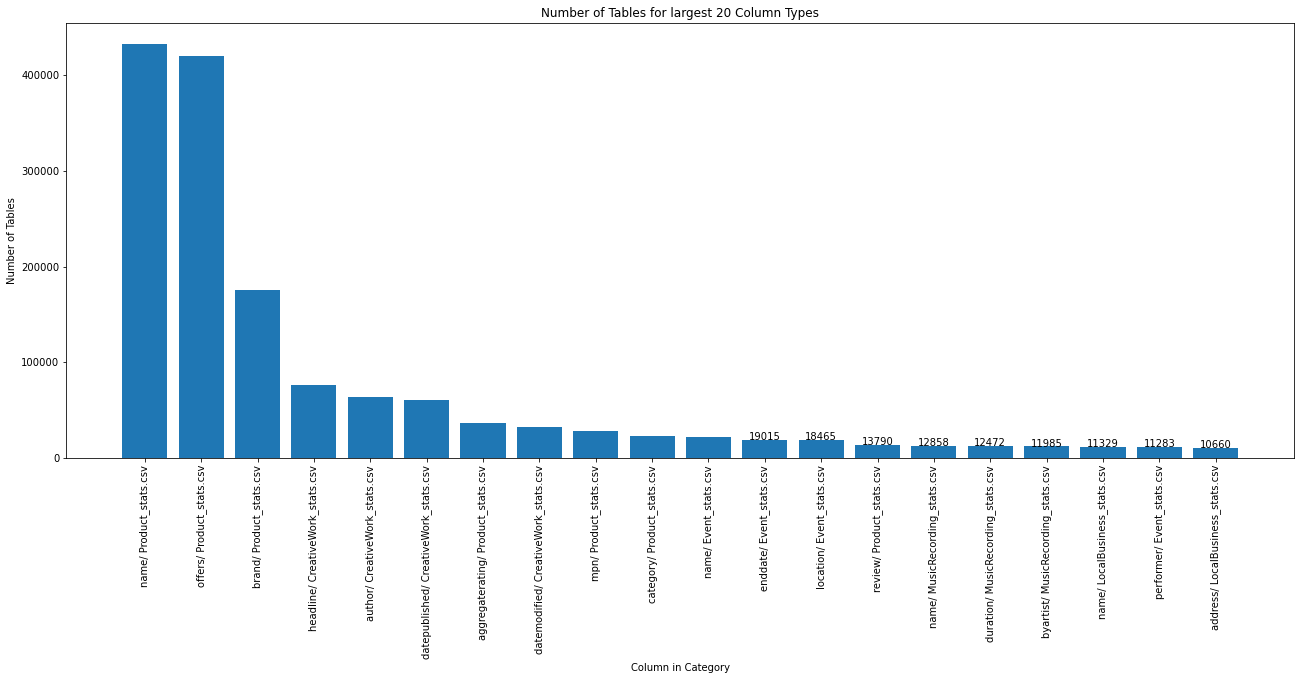

In [49]:
plt.figure(figsize=(22,8))
x = largest20_columns['schema_type']
y = largest20_columns['num_tables']
plt.bar(x,y)
plt.xlabel('Column in Category')
plt.ylabel('Number of Tables')
plt.title('Number of Tables for largest 20 Column Types')
plt.xticks(rotation=90)

for i,j in zip(x, y):
    if (j < 20000): 
        plt.annotate(str(round(j)), xy=(i,j), ha ='center')

plt.show()

In [55]:
categories = files.groupby('filename').agg({'column_name':'count'})

In [56]:
categories

,column_name
filename,
Book_stats.csv,12
CreativeWork_stats.csv,23
Event_stats.csv,11
Hotel_stats.csv,8
LocalBusiness_stats.csv,25
MusicAlbum_stats.csv,4
MusicRecording_stats.csv,7
Person_stats.csv,25
Place_stats.csv,5


In [57]:
categories = categories.sort_values(['column_name'], ascending=False)

In [58]:
categories

,column_name
filename,
Product_stats.csv,48
LocalBusiness_stats.csv,25
Person_stats.csv,25
Recipe_stats.csv,24
CreativeWork_stats.csv,23
Book_stats.csv,12
Restaurant_stats.csv,12
Event_stats.csv,11
Hotel_stats.csv,8


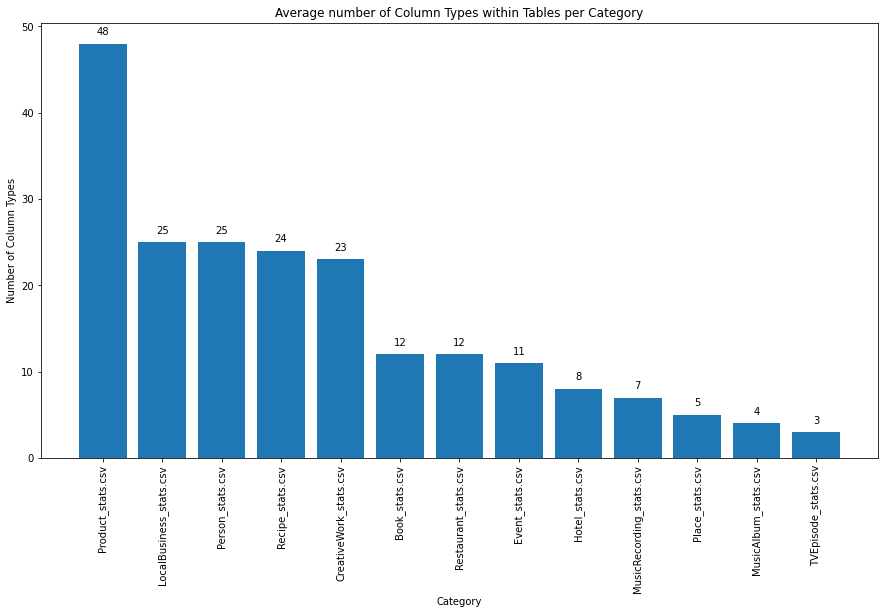

In [66]:
plt.figure(figsize=(15,8))
x = categories.index
y = categories['column_name']
plt.bar(x,y)
plt.xlabel('Category')
plt.ylabel('Number of Column Types')
plt.title('Average number of Column Types within Tables per Category')
plt.xticks(rotation=90)
for index,data in enumerate(y):
    plt.text(x=index , y =data+1, s=f"{data}", ha ='center')
plt.show()

In [14]:
matching_columns = files.groupby('prob_matches').agg({'schema_type':'count'})
matching_columns=matching_columns.sort_values(['schema_type'],ascending=False)

In [29]:
matching_columns = pd.read_csv('../notebooks/overview_cats.csv')
matching_columns.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [15]:
matching_columns
matching_columns.loc[matching_columns.index == 'nationality', 'schema_type'] = 3
matching_columns.loc[matching_columns.index == 'gender', 'schema_type'] = 3

In [25]:
matching_columns=matching_columns.sort_values(['schema_type'],ascending=False)
matching_columns

KeyError: 'schema_type'

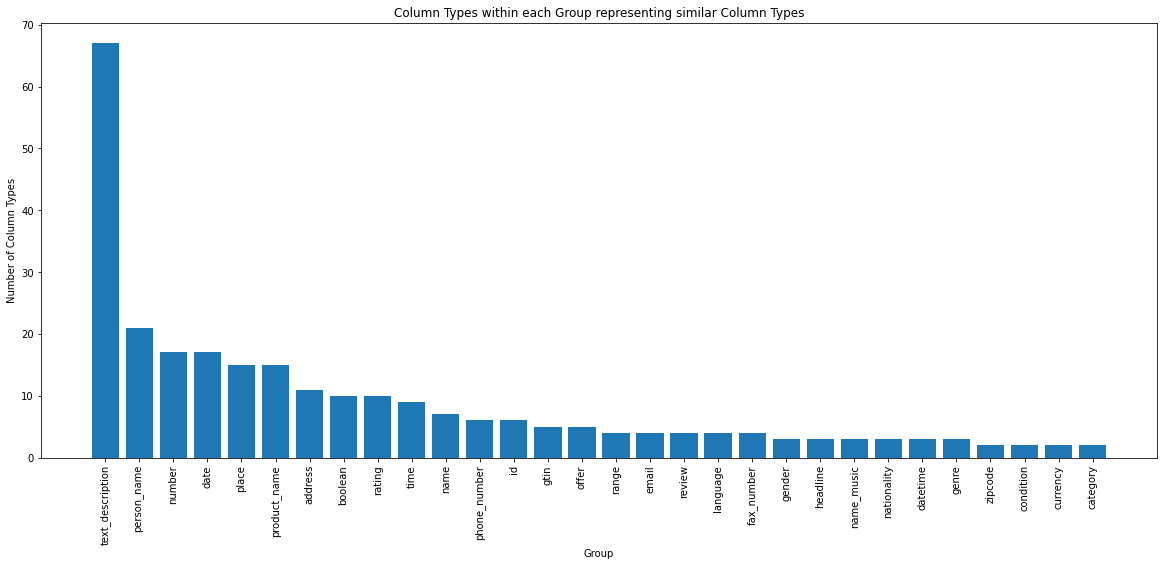

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x = matching_columns['Unnamed: 0']
y = matching_columns['0']
plt.bar(x,y)
plt.xlabel('Group')
plt.ylabel('Number of Column Types')
plt.title('Column Types within each Group representing similar Column Types')
plt.xticks(rotation=90)
#for index,data in enumerate(y):
#    plt.text(x=index , y =data+1, s=f"{data}", ha ='center')
plt.show()